In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [55]:
dataset = pd.read_csv("storage_dataset/prototype_final_dataset.csv")
dataset

,Date,Time,SM_2,SM_4,SM_8,SM_20,SM_40,ST_2,ST_4,ST_8,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,01-01-2022,00:00,38.2,35.9,31.0,36.9,34.0,15.9,15.5,15.5,...,1009.4,100.0,16.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"KHSV,72323003856,72030763804,KMDQ,AAMA1"
1,01-01-2022,01:00,38.2,36.0,30.9,36.7,34.1,16.0,15.6,15.6,...,1009.3,91.7,16.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"KHSV,72323003856,72030763804,KMDQ,AAMA1"
2,01-01-2022,02:00,38.3,36.0,31.0,36.7,33.9,16.0,15.6,15.6,...,1009.3,62.7,16.0,0.0,0.0,0.0,NaN,Partially cloudy,partly-cloudy-night,"KHSV,72323003856,72030763804,KMDQ,AAMA1"
3,01-01-2022,03:00,38.3,35.8,30.9,36.7,33.9,16.1,15.7,15.6,...,1009.3,91.7,16.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"KHSV,72323003856,72030763804,KMDQ,AAMA1"
4,01-01-2022,04:00,38.3,35.9,30.9,36.7,33.9,16.2,15.7,15.7,...,1009.6,100.0,16.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"KHSV,72323003856,72030763804,KMDQ"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,31-12-2022,19:00,36.8,36.5,30.6,34.7,31.8,10.5,10.1,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8756,31-12-2022,20:00,36.7,36.2,30.5,34.7,31.8,10.2,10.0,9.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8757,31-12-2022,21:00,36.5,36.1,30.3,34.9,31.8,9.9,9.9,9.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8758,31-12-2022,22:00,36.5,36.1,30.3,34.8,32.0,9.7,9.7,9.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
dataset.columns

Index(['Date', 'Time', 'SM_2', 'SM_4', 'SM_8', 'SM_20', 'SM_40', 'ST_2',
       'ST_4', 'ST_8', 'ST_20', 'ST_40', 'temp', 'feelslike', 'dew',
       'humidity', 'precip', 'precipprob', 'preciptype', 'snow', 'snowdepth',
       'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover',
       'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk',
       'conditions', 'icon', 'stations'],
      dtype='object')

In [57]:
dataset.__len__()

8760

In [58]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              8760 non-null   object 
 1   Time              8760 non-null   object 
 2   SM_2              8760 non-null   float64
 3   SM_4              8760 non-null   float64
 4   SM_8              8760 non-null   float64
 5   SM_20             8760 non-null   float64
 6   SM_40             8760 non-null   float64
 7   ST_2              8760 non-null   float64
 8   ST_4              8760 non-null   float64
 9   ST_8              8760 non-null   float64
 10  ST_20             8760 non-null   float64
 11  ST_40             8760 non-null   float64
 12  temp              4343 non-null   float64
 13  feelslike         4343 non-null   float64
 14  dew               4343 non-null   float64
 15  humidity          4343 non-null   float64
 16  precip            4343 non-null   float64


In [59]:
dataset.__len__()

8760

In [60]:
dataset

,Date,Time,SM_2,SM_4,SM_8,SM_20,SM_40,ST_2,ST_4,ST_8,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,01-01-2022,00:00,38.2,35.9,31.0,36.9,34.0,15.9,15.5,15.5,...,1009.4,100.0,16.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"KHSV,72323003856,72030763804,KMDQ,AAMA1"
1,01-01-2022,01:00,38.2,36.0,30.9,36.7,34.1,16.0,15.6,15.6,...,1009.3,91.7,16.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"KHSV,72323003856,72030763804,KMDQ,AAMA1"
2,01-01-2022,02:00,38.3,36.0,31.0,36.7,33.9,16.0,15.6,15.6,...,1009.3,62.7,16.0,0.0,0.0,0.0,NaN,Partially cloudy,partly-cloudy-night,"KHSV,72323003856,72030763804,KMDQ,AAMA1"
3,01-01-2022,03:00,38.3,35.8,30.9,36.7,33.9,16.1,15.7,15.6,...,1009.3,91.7,16.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"KHSV,72323003856,72030763804,KMDQ,AAMA1"
4,01-01-2022,04:00,38.3,35.9,30.9,36.7,33.9,16.2,15.7,15.7,...,1009.6,100.0,16.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"KHSV,72323003856,72030763804,KMDQ"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,31-12-2022,19:00,36.8,36.5,30.6,34.7,31.8,10.5,10.1,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8756,31-12-2022,20:00,36.7,36.2,30.5,34.7,31.8,10.2,10.0,9.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8757,31-12-2022,21:00,36.5,36.1,30.3,34.9,31.8,9.9,9.9,9.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8758,31-12-2022,22:00,36.5,36.1,30.3,34.8,32.0,9.7,9.7,9.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
dataset.drop(
    [
        "Date",
        "SM_2",
        "SM_8",
        "SM_20",
        "SM_40",
        "ST_2",
        "ST_8",
        "ST_20",
        "ST_40",
        "solarenergy",
        "precipprob",
        "preciptype",
        "snow",
        "snowdepth",
        "windgust",
        "winddir",
        "sealevelpressure",
        "visibility",
        "solarenergy",
        "uvindex",
        "severerisk",
        "icon",
        "stations",
        "dew",
        "solarradiation",
        "Time",
        # "cloudcover",
        "feelslike",
        # "windspeed",
    ],
    inplace=True,
    axis=1,
)

In [62]:
dataset

,SM_4,ST_4,temp,humidity,precip,windspeed,cloudcover,conditions
0,35.9,15.5,21.6,84.50,0.0,22.3,100.0,Overcast
1,36.0,15.6,21.6,84.97,0.0,27.7,91.7,Overcast
2,36.0,15.6,21.2,86.87,0.0,22.8,62.7,Partially cloudy
3,35.8,15.7,21.2,86.66,0.0,22.8,91.7,Overcast
4,35.9,15.7,21.6,84.50,0.0,19.8,100.0,Overcast
...,...,...,...,...,...,...,...,...
8755,36.5,10.1,NaN,NaN,NaN,NaN,NaN,NaN
8756,36.2,10.0,NaN,NaN,NaN,NaN,NaN,NaN
8757,36.1,9.9,NaN,NaN,NaN,NaN,NaN,NaN
8758,36.1,9.7,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SM_4        8760 non-null   float64
 1   ST_4        8760 non-null   float64
 2   temp        4343 non-null   float64
 3   humidity    4343 non-null   float64
 4   precip      4343 non-null   float64
 5   windspeed   4343 non-null   float64
 6   cloudcover  4343 non-null   float64
 7   conditions  4343 non-null   object 
dtypes: float64(7), object(1)
memory usage: 547.6+ KB


In [64]:
dataset = dataset.dropna()

In [65]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4343 entries, 0 to 4343
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SM_4        4343 non-null   float64
 1   ST_4        4343 non-null   float64
 2   temp        4343 non-null   float64
 3   humidity    4343 non-null   float64
 4   precip      4343 non-null   float64
 5   windspeed   4343 non-null   float64
 6   cloudcover  4343 non-null   float64
 7   conditions  4343 non-null   object 
dtypes: float64(7), object(1)
memory usage: 305.4+ KB


In [66]:
dataset.columns

Index(['SM_4', 'ST_4', 'temp', 'humidity', 'precip', 'windspeed', 'cloudcover',
       'conditions'],
      dtype='object')

In [67]:
cat_val_cond = dataset.conditions.unique()
print(cat_val_cond)
print(len(cat_val_cond))

['Overcast' 'Partially cloudy' 'Rain, Partially cloudy' 'Rain, Overcast'
 'Snow, Rain, Overcast' 'Snow, Rain, Partially cloudy' 'Clear'
 'Snow, Overcast' 'Rain']
9


In [68]:
dataset

,SM_4,ST_4,temp,humidity,precip,windspeed,cloudcover,conditions
0,35.9,15.5,21.6,84.50,0.0,22.3,100.0,Overcast
1,36.0,15.6,21.6,84.97,0.0,27.7,91.7,Overcast
2,36.0,15.6,21.2,86.87,0.0,22.8,62.7,Partially cloudy
3,35.8,15.7,21.2,86.66,0.0,22.8,91.7,Overcast
4,35.9,15.7,21.6,84.50,0.0,19.8,100.0,Overcast
...,...,...,...,...,...,...,...,...
4339,21.9,28.1,30.2,58.27,0.0,13.6,47.2,Partially cloudy
4340,21.6,28.0,28.7,65.81,0.0,14.4,56.2,Partially cloudy
4341,21.6,27.8,27.6,67.50,0.0,8.6,25.3,Partially cloudy
4342,21.6,27.6,25.9,76.62,0.0,2.2,19.1,Clear


In [69]:
X = dataset.iloc[:, 1:].values
X

array([[15.5, 21.6, 84.5, ..., 22.3, 100.0, 'Overcast'],
       [15.6, 21.6, 84.97, ..., 27.7, 91.7, 'Overcast'],
       [15.6, 21.2, 86.87, ..., 22.8, 62.7, 'Partially cloudy'],
       ...,
       [27.8, 27.6, 67.5, ..., 8.6, 25.3, 'Partially cloudy'],
       [27.6, 25.9, 76.62, ..., 2.2, 19.1, 'Clear'],
       [27.4, 25.0, 80.27, ..., 2.7, 14.2, 'Clear']], dtype=object)

In [70]:
y = dataset.iloc[:, 0].values
y

array([35.9, 36. , 36. , ..., 21.6, 21.6, 21.9])

In [71]:
""" taking care of categorical data in conditions column """
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    transformers=[("encoder", OneHotEncoder(), [-1])], remainder="passthrough"
)
X = np.array(ct.fit_transform(X))
X

array([[0.0, 1.0, 0.0, ..., 0.0, 22.3, 100.0],
       [0.0, 1.0, 0.0, ..., 0.0, 27.7, 91.7],
       [0.0, 0.0, 1.0, ..., 0.0, 22.8, 62.7],
       ...,
       [0.0, 0.0, 1.0, ..., 0.0, 8.6, 25.3],
       [1.0, 0.0, 0.0, ..., 0.0, 2.2, 19.1],
       [1.0, 0.0, 0.0, ..., 0.0, 2.7, 14.2]], dtype=object)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

In [73]:
X_train.shape

(3257, 15)

In [74]:
y_train.shape

(3257,)

In [75]:
X_test.shape

(1086, 15)

In [76]:
y_test.shape

(1086,)

In [77]:
X_train[0]

array([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.4, -1.0, 80.74,
       0.0, 13.7, 100.0], dtype=object)

In [78]:
y_train[0]

38.3

In [79]:
""" Scaling data """
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_train[:, 9:] = sc.fit_transform(X_train[:, 9:])
X_test[:, 9:] = sc.transform(X_test[:, 9:])
X_train[0]

array([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.332,
       0.16289592760180993, 0.7760204674962204, 0.0, 0.28781512605042014,
       1.0], dtype=object)

In [80]:
X_train[0]

array([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.332,
       0.16289592760180993, 0.7760204674962204, 0.0, 0.28781512605042014,
       1.0], dtype=object)

In [81]:
X_test[0]

array([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.284,
       0.5294117647058824, 0.18478892894522617, 0.0, 0.22478991596638653,
       0.741], dtype=object)

In [82]:
X_train[0].shape

(15,)

<h1>ANN model </h1>


In [83]:
""" Model """
model = keras.Sequential(
    [
        keras.layers.Dense(15, activation=keras.activations.relu),
        keras.layers.Dense(8, activation=keras.activations.relu),
        keras.layers.Dense(4, activation=keras.activations.relu),
        keras.layers.Dense(2, activation=keras.activations.relu),
        keras.layers.Dense(1),
    ]
)

In [84]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.mean_squared_error,
    metrics=keras.metrics.mean_absolute_error,
)

In [85]:
X_train = np.asarray(X_train).astype("float32")
y_train = np.asarray(y_train).astype("float32")

In [86]:
X_train[0]

array([0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.332     ,
       0.16289593, 0.77602047, 0.        , 0.28781512, 1.        ],
      dtype=float32)

In [87]:
history = model.fit(X_train, y_train, epochs=15)
model.summary()

Epoch 1/15


102/102 [==============================] - 1s 969us/step - loss: 986.7140 - mean_absolute_error: 30.8725
Epoch 2/15
102/102 [==============================] - 0s 1ms/step - loss: 468.9381 - mean_absolute_error: 19.5445
Epoch 3/15
102/102 [==============================] - 0s 937us/step - loss: 69.6141 - mean_absolute_error: 7.3457
Epoch 4/15
102/102 [==============================] - 0s 1ms/step - loss: 57.8462 - mean_absolute_error: 6.6808
Epoch 5/15
102/102 [==============================] - 0s 915us/step - loss: 49.0444 - mean_absolute_error: 6.1255
Epoch 6/15
102/102 [==============================] - 0s 997us/step - loss: 41.2595 - mean_absolute_error: 5.5662
Epoch 7/15
102/102 [==============================] - 0s 959us/step - loss: 32.4546 - mean_absolute_error: 4.8793
Epoch 8/15
102/102 [==============================] - 0s 1ms/step - loss: 25.9632 - mean_absolute_error: 4.2463
Epoch 9/15
102/102 [==============================] - 0s 940us/step - loss: 21.6345 - mean_absolute_e

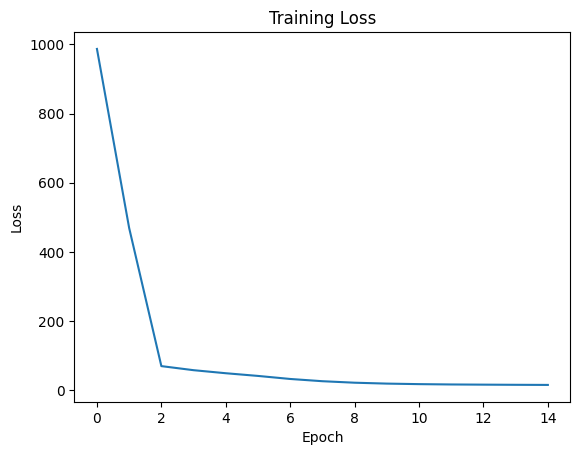

In [88]:
plt.plot(history.history["loss"])
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [89]:
X_test = np.asarray(X_test).astype("float32")
y_test = np.asarray(y_test).astype("float32")

In [90]:
y_pred = model.predict(X_test).reshape(-1, 1)
y_pred

34/34 [==============================] - 0s 801us/step


array([[31.544752],
       [34.888287],
       [26.874546],
       ...,
       [26.974762],
       [38.599426],
       [38.08196 ]], dtype=float32)

In [91]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

annMAR = mean_absolute_error(y_test, y_pred)
annMSR = mean_squared_error(y_test, y_pred)
print(annMAR)
print(annMSR)

3.1731641
15.5348215


In [92]:
to_predit = X_train[0].reshape(-1, X_train.shape[1])

In [93]:
model.predict(to_predit)

1/1 [==============================] - 0s 19ms/step


array([[34.48807]], dtype=float32)

<H1>MULTIPLE LINEAR REGRESSION </H1>


In [94]:
from sklearn.linear_model import LinearRegression

mlrModel = LinearRegression()
mlrModel.fit(X_train, y_train)

LinearRegression()

In [95]:
mlr_ypred = mlrModel.predict(X_test)

In [96]:
mlr_MAR = mean_absolute_error(y_test, mlr_ypred)
mlr_MSR = mean_squared_error(y_test, mlr_ypred)
print(mlr_MAR)
print(mlr_MSR)

2.9240415
12.928233


<h1>DECISION TREE REGRESSION </H1>


In [97]:
from sklearn.tree import DecisionTreeRegressor

In [98]:
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [99]:
X_train[0]

array([0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.332     ,
       0.16289593, 0.77602047, 0.        , 0.28781512, 1.        ],
      dtype=float32)

In [100]:
dtr_ypred = dtr.predict(X_test)

In [101]:
dtr_ypred

array([32.29999924, 41.09999847, 27.79999924, ..., 21.79999924,
       34.5       , 35.40000153])

In [102]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(mean_absolute_error(y_test, dtr_ypred))
print(mean_squared_error(y_test, dtr_ypred))

1.7883056584423198
10.849437966322013


In [103]:
comp = np.concatenate(
    (
        y_test.reshape(len(y_test), 1),
        mlr_ypred.reshape(len(y_pred), 1),
        y_pred.reshape(len(y_pred), 1),
        dtr_ypred.reshape(len(y_pred), 1),
    ),
    1,
)

In [104]:
comparison = pd.DataFrame(
    comp, columns=["ytest", "mlr_ypred", "ann_ypred", "dtr_ypred"]
).to_csv("model comparison.csv")

In [105]:
import joblib

In [106]:
joblib.dump(dtr, filename="final_model/dtr.bin")

['final_model/dtr.bin']

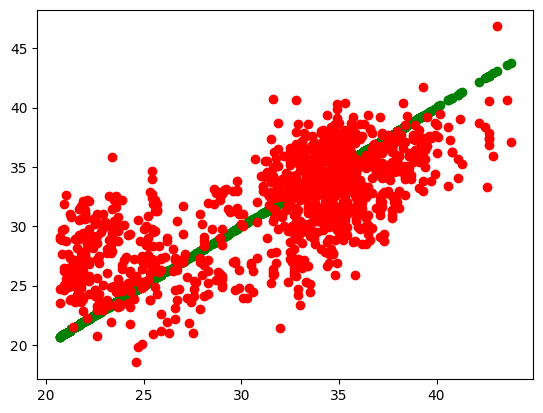

In [108]:
plt.scatter(y_test, y_test, color="green")
plt.scatter(y_test, y_pred, color="red")

<h1>SVR</h1>

In [109]:
from sklearn.svm import SVR

regressor = SVR(kernel="rbf")
regressor.fit(X_train, y_train)

SVR()

In [111]:
svr_ypred = regressor.predict(X_test)

In [112]:
mean_absolute_error(y_test, svr_ypred)

2.4475969739607235

In [113]:
mean_squared_error(y_test, svr_ypred)

11.561017547228465

In [117]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=10, random_state=0)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [118]:
rfr_ypred = rfr.predict(X_test)

In [119]:
mean_absolute_error(y_test, rfr_ypred)

1.6493646553208157

In [120]:
mean_squared_error(y_test, rfr_ypred)

6.517215190126854

In [122]:
comp = np.concatenate(
    (
        y_test.reshape(len(y_test), 1),
        rfr_ypred.reshape(len(y_test), 1),
        dtr_ypred.reshape(len(y_pred), 1),
        mlr_ypred.reshape(len(y_pred), 1),
        y_pred.reshape(len(y_pred), 1),
        svr_ypred.reshape(len(y_pred), 1),
    ),
    1,
)

comparison = pd.DataFrame(
    comp, columns=["ytest", "rfr", "dtr_ypred",
                   "mlr_ypred", "ann_ypred", "SVR"]
).to_csv("model comparison.csv")